<a href="https://colab.research.google.com/github/Gulzar-khan/ML-PRACTICE/blob/main/Assignment_Solution_K_Nearest_Neighbors_recommendation_sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>Build a recommender system which would recommend the 5 most similar movies to a movie query. </b>

### Suppose you are working at IMDB and you want to find out which movies are similar to a given movie. We can use kNN algorithm to identify the most similar movies. In the given dataset, we are given a lot of information about a particular movie. We need to restrict ourselves to the columns, Movie ID, Movie Name, IMDB Rating and binary indicators of different genres. 

### A sample dataset might look like :





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


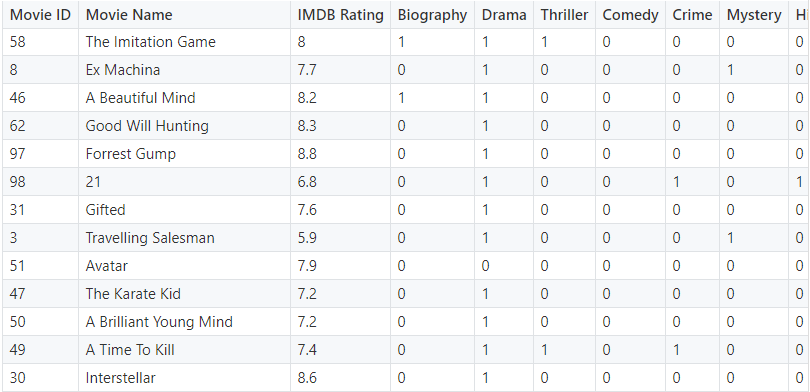

### You can keep all the genres indicators as columns. Suppose in the column genres, you have 20 distinct genres then you will create 20 different indicators.

### Also you need to take any 1000 movies in your train dataset and 10 movies in your test corresponding to which you need to print the 5 most similar movies since kNN becomes computationally intensive as the number of observations increases.

In [ ]:
import pandas as pd
path='/content/drive/MyDrive/'
imdb_df=pd.read_csv(path+'imdb_data.csv')

In [ ]:
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
imdb_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [ ]:
imdb_df.title

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                     Marine Boy
                          ...                   
2995                                     Chasers
2996                            We Are the Best!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: title, Length: 3000, dtype: object

Selectinf 1100 movies from the data set , so that we can clean and remove few

In [ ]:
df=imdb_df[['id','genres','popularity','title']].sample(n = 1100, replace = False)

In [ ]:
df.head()

,id,genres,popularity,title
2306,2307,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",6.518028,Evangelion: 2.0 You Can (Not) Advance
289,290,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",13.856199,Thumbelina
2299,2300,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",13.155901,The Truman Show
1467,1468,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",11.736241,Predator 2
722,723,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",5.007836,High Spirits


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['genres'] = df.apply(lambda row: eval(row['genres']), axis=1)

In [ ]:
df.index=range(len(df))

In [ ]:
df.head()

,id,genres,popularity,title
0,2307,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",6.518028,Evangelion: 2.0 You Can (Not) Advance
1,290,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",13.856199,Thumbelina
2,2300,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",13.155901,The Truman Show
3,1468,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",11.736241,Predator 2
4,723,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",5.007836,High Spirits


In [ ]:
df['genres'][1]

[{'id': 16, 'name': 'Animation'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'}]

In [ ]:
import numpy as np

genres_list = []
for index, row in df.iterrows():
    innerlist=[]
    genre_list = df.loc[index, 'genres']
    for elem in genre_list:
        innerlist.append(elem['name'])
    genres_list.append(innerlist)

genres_list=np.array([np.array(xi) for xi in genres_list])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
genres_list[0:5]

array([array(['Animation', 'Science Fiction', 'Action', 'Drama'], dtype='<U15'),
       array(['Animation', 'Drama', 'Family', 'Fantasy'], dtype='<U9'),
       array(['Comedy', 'Drama'], dtype='<U6'),
       array(['Science Fiction', 'Action', 'Thriller'], dtype='<U15'),
       array(['Horror', 'Fantasy', 'Comedy'], dtype='<U7')], dtype=object)

In [ ]:
df['genres_list']=genres_list

In [ ]:
df.head()

,id,genres,popularity,title,genres_list
0,2307,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",6.518028,Evangelion: 2.0 You Can (Not) Advance,"[Animation, Science Fiction, Action, Drama]"
1,290,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",13.856199,Thumbelina,"[Animation, Drama, Family, Fantasy]"
2,2300,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",13.155901,The Truman Show,"[Comedy, Drama]"
3,1468,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",11.736241,Predator 2,"[Science Fiction, Action, Thriller]"
4,723,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",5.007836,High Spirits,"[Horror, Fantasy, Comedy]"


In [ ]:
df.drop('genres',axis=1,inplace=True)

In [ ]:
df.head()

,id,popularity,title,genres_list
0,2307,6.518028,Evangelion: 2.0 You Can (Not) Advance,"[Animation, Science Fiction, Action, Drama]"
1,290,13.856199,Thumbelina,"[Animation, Drama, Family, Fantasy]"
2,2300,13.155901,The Truman Show,"[Comedy, Drama]"
3,1468,11.736241,Predator 2,"[Science Fiction, Action, Thriller]"
4,723,5.007836,High Spirits,"[Horror, Fantasy, Comedy]"


In [ ]:

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('genres_list')),
                index=df.index,
                columns=mlb.classes_))

In [ ]:
column_sum= df.drop(['id','popularity'],axis=1).sum(numeric_only=True, axis=0)

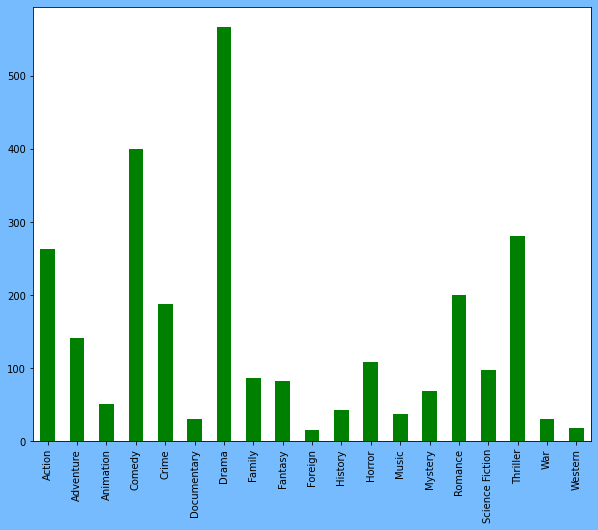

In [ ]:
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8),edgecolor='k',facecolor='xkcd:sky blue')
column_sum.plot(kind='bar',color='green')
plt.show()

Just checking for the correlation among diffrent genres

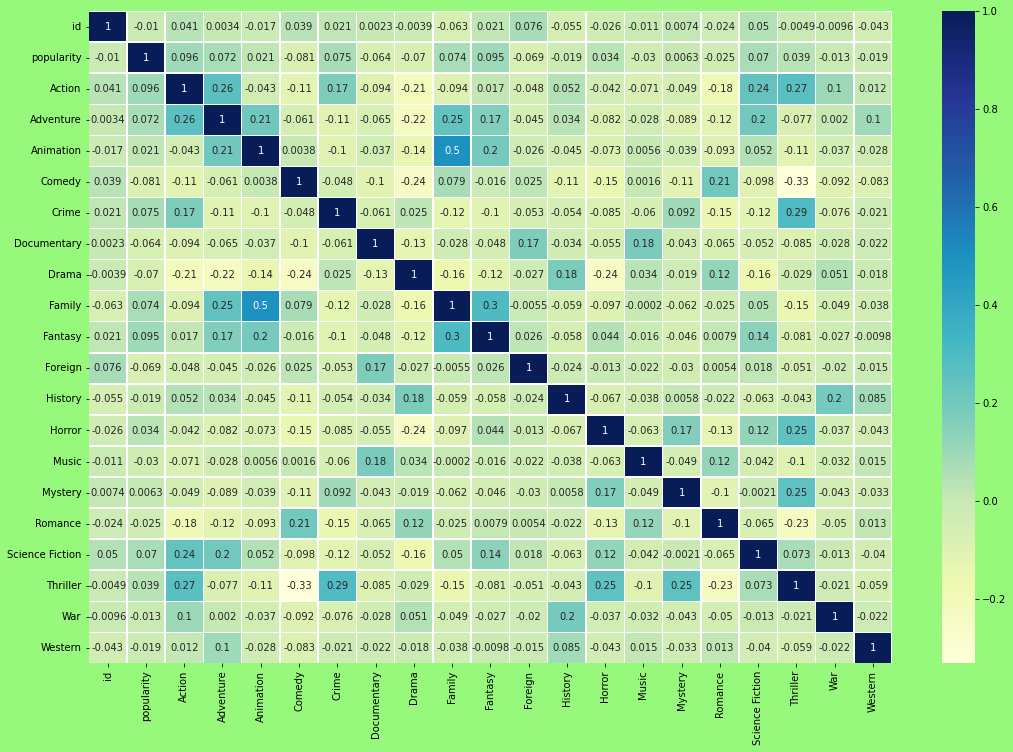

In [ ]:
plt.figure(figsize=(18,12),edgecolor='k',facecolor='xkcd:light green')
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidths=.5)

HArd To draw any conclusion from it

In [ ]:
X=df.set_index('title')
X.drop(columns='id',inplace=True)
X

,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
Evangelion: 2.0 You Can (Not) Advance,6.518028,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
Thumbelina,13.856199,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
The Truman Show,13.155901,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Predator 2,11.736241,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
High Spirits,5.007836,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Club Dread,6.576130,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
All The Queen's Men,1.652275,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Rudy,5.914833,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(X.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)



NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:

query_index = np.random.choice(X.shape[0])
print(query_index)


536


In [ ]:
distances, indices = model_knn.kneighbors(np.array(X.iloc[query_index,:].values).reshape(1, -1), n_neighbors = 6)


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(X.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, X.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Greatest Movie Ever Sold:

1: Comedian, with distance of 0.009073208448030168:
2: Louis C.K.: Live at the Beacon Theater, with distance of 0.023719357931307194:
3: Out Cold, with distance of 0.023758778741458264:
4: Would I Lie to You? 2, with distance of 0.023870974773295806:
5: The Pirate Bay: Away From Keyboard, with distance of 0.023906217095182036:


In [ ]:
X_test=df[1001:1010].set_index('title')
X_test.drop(columns='id',inplace=True)

In [ ]:

test_movie=X_test.index.tolist()

In [ ]:
for movie_name in test_movie:
    model_knn.fit(X_test)
    distances, indices = model_knn.kneighbors(np.array(X.loc[movie_name,:].values).reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(movie_name))
            print()
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, X.index[indices.flatten()[i]], distances.flatten()[i]))
    print()

Recommendations for White God:


1: Predator 2, with distance of 0.009984706951130295:
2: Thumbelina, with distance of 0.015977186274948485:
3: [REC], with distance of 0.0162109741719334:
4: The Amateur, with distance of 0.016925939752207353:
5: The Truman Show, with distance of 0.021751759583907404:

Recommendations for True Story:


1: Evangelion: 2.0 You Can (Not) Advance, with distance of 0.015977186274948485:
2: Predator 2, with distance of 0.021538361893250868:
3: The Truman Show, with distance of 0.024138811624151546:
4: [REC], with distance of 0.03265802209475843:
5: The Amateur, with distance of 0.03346929033620938:

Recommendations for The Chase:


1: Predator 2, with distance of 0.009678047848380111:
2: Evangelion: 2.0 You Can (Not) Advance, with distance of 0.021751759583907404:
3: Thumbelina, with distance of 0.024138811624151546:
4: [REC], with distance of 0.02908907592837595:
5: The Amateur, with distance of 0.042594758161911606:

Recommendations for Fight Club:


1: The

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: Futur

\This is how we are able to genrate recomendations using knn

In [ ]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'minkowski', algorithm = 'auto')
model_knn.fit(movie_features_df_matrix)



NearestNeighbors()

In [ ]:
for movie_name in test_movie:
    model_knn.fit(X_test)
    distances, indices = model_knn.kneighbors(np.array(X.loc[movie_name,:].values).reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(movie_name))
            print()
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, X.index[indices.flatten()[i]], distances.flatten()[i]))
    print()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: Futur

Recommendations for White God:


1: [REC], with distance of 1.3233304796610696:
2: The Amateur, with distance of 1.3974256835324015:
3: Thumbelina, with distance of 2.1045412060648734:
4: High Spirits, with distance of 2.9777410289051325:
5: The Girl Next Door, with distance of 6.019324988707953:

Recommendations for True Story:


1: Evangelion: 2.0 You Can (Not) Advance, with distance of 2.1045412060648734:
2: [REC], with distance of 2.9802615364469265:
3: The Amateur, with distance of 3.0699424977613177:
4: High Spirits, with distance of 4.63296614725383:
5: The Truman Show, with distance of 6.864903626022437:

Recommendations for The Chase:


1: Thumbelina, with distance of 6.8649036260224365:
2: Evangelion: 2.0 You Can (Not) Advance, with distance of 8.353901648226474:
3: [REC], with distance of 9.137366787450366:
4: The Amateur, with distance of 9.351690151370981:
5: High Spirits, with distance of 10.809236603483892:

Recommendations for Fight Club:


1: The Truman Show, with dist

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: Futur